In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import scipy
from matplotlib import colors

import FAIRStream

In [2]:
# csv pool folder directory
csv_pool_path = '/Users/jiaxingqiu/Documents/CAMA_projects/BSI/code/projects/csv_pool'
# current experiment working directory
work_dir = '/Users/jiaxingqiu/Documents/CAMA_projects/BSI/code/projects/case_txp'

In [3]:
# initiate a FAIRStream object instance for BSI project
bsi_stream = FAIRStream.FAIRStream(work_dir)
# take a look at dictionaries in engineer's hands
#bsi_stream.engineer.csv_source_dict
bsi_stream.engineer.variable_dict

Success: Querier has initiated a csv source dictionary in:/Users/jiaxingqiu/Documents/CAMA_projects/BSI/code/projects/case_txp/meta_data/csv_source_dict_demo.json
Success: Querier has initiated a variable dictionary in:/Users/jiaxingqiu/Documents/CAMA_projects/BSI/code/projects/case_txp/meta_data/variable_dict_demo.json
Unable to read sql source dictionary. Use Querier.update_sql_source_dict() to build one.


{'__uid': {'src_names': ['id', 'ID', 'subject_id', 'subject_id'],
  'label': 'unique subject id for current study',
  'unique_per_sbj': True},
 '__time': {'src_names': ['tsa', 'tsa', 'timeMinutes', 'timeMinutes'],
  'label': 'time since admission',
  'unit': 'minute'},
 '__anchor': {'src_names': ['True_positive', 'True positive'],
  'label': 'anchor for an episode',
  'unique_per_sbj': False,
  'factor': {'levels': {'__neg_nbc': ['0', '0.0', 'nan'],
    '__pos': ['1', '1.0']},
   'impute_per_sbj': {'nan_level': '__neg_nbc'}}},
 'y': {'output': True,
  'src_names': ['True_positive', 'True positive'],
  'label': 'Event outcome result',
  'unique_per_sbj': False,
  'factor': {'levels': {'nbc': ['nan'],
    'neg': ['0', '0.0'],
    'pos': ['1', '1.0']},
   'impute_per_sbj': {'nan_level': 'nbc'}}},
 'txp': {'input': True,
  'src_names': ['Confirmed Txp'],
  'label': 'Transplant recipient',
  'unique_per_sbj': True,
  'factor': {'levels': {'no': ['0', '0.0', 'nan'], 'yes': ['1', '1.0']},
   

In [4]:
# define an episode (notice that the engineer now has new attributes)
bsi_stream.engineer.DefineEpisode(input_time_len=2*24*60, # using vital signs and labs 4 days prior to a culture 
                                  output_time_len=24*60, # predict one time unit into the future
                                  time_resolution=60, # aggregate minutely data to one row per hour 
                                  time_lag=0,  # no time lag between predictors and response
                                  anchor_gap=7*24*60) # the minimum distance between two episodes

 
Success! An episode is defined to 
--- use 2880 minute(s) long input variables 
--- predict 1440 minute(s) response variables into the future
--- lag 0 minute(s) between predictors and responses
--- increase by every 60 minute(s)
--- last at most 10080 minute(s) long
Success! Engineer has updated attributes --- episode. 


In [5]:
# Build MVTS dataframe or tfds  (notice that the engineer now has new attributes)
bsi_stream.engineer.BuildMVTS(csv_pool_path, 
                              #nsbj = 6000, # number of subjects / patients to sample from the pool 
                              nsbj = 60, # number of subjects / patients to sample from the pool 
                              replace=True, # sample with replacement or not 
                              valid_frac = 0.2, # fraction of number of subjects in validation dataset
                              test_frac = 0, # fraction of number of subjects in left-out test dataset
                              batch_size = 64, # batch size (usually 32,64,128..)
                              impute_input='median', # imputation on predictors
                              impute_output='median' )# imputation on response (no need in BSI project)

# please see the end of console 
# # --- Success! Engineer has updated attributes --- train_df_imputed, valid_df_imputed and test_df_imputed. 
# # --- Success! Engineer has updated attributes --- train_tfds, valid_tfds and test_tfds. 

Engineer is sampling with replacement --- 
Success!  60 out of 5671 subjects are sampled from csv pool of size 26093 !
--- fix upper boundary for age by nan
--- fix lower boundary for age by nan
--- fix upper boundary for temp by nan
--- fix lower boundary for temp by nan
--- fix upper boundary for heart_rate by nan
--- fix lower boundary for heart_rate by nan
--- fix upper boundary for resp_rate by nan
--- fix lower boundary for resp_rate by nan
--- fix upper boundary for spo2 by nan
--- fix lower boundary for spo2 by nan
--- fix upper boundary for x_hr_rr by nan
--- fix lower boundary for x_hr_rr by nan
--- fix upper boundary for s_hr by nan
--- fix lower boundary for s_hr by nan
--- fix upper boundary for s_rr by nan
--- fix lower boundary for s_rr by nan
--- fix upper boundary for s_so2 by nan
--- fix lower boundary for s_so2 by nan
--- fix upper boundary for systolic_blood_pressure by nan
--- fix lower boundary for systolic_blood_pressure by nan
--- fix upper boundary for diastoli

Success! Output/responce variable mean in current sample space  --- 
y___pos    0.146341
y___nbc    0.243902
y___neg    0.609756
dtype: float64
--- prepare episodes for uva_3598
Success! Output/responce variable mean in current sample space  --- 
y___pos    0.142857
y___nbc    0.261905
y___neg    0.595238
dtype: float64
--- prepare episodes for uva_7928
Success! Output/responce variable mean in current sample space  --- 
y___pos    0.139535
y___nbc    0.279070
y___neg    0.581395
dtype: float64
--- prepare episodes for uva_4814
Success! Output/responce variable mean in current sample space  --- 
y___pos    0.136364
y___nbc    0.272727
y___neg    0.590909
dtype: float64
--- prepare episodes for uva_7790
Success! Output/responce variable mean in current sample space  --- 
y___pos    0.133333
y___nbc    0.288889
y___neg    0.577778
dtype: float64
--- prepare episodes for uva_3157
Success! Output/responce variable mean in current sample space  --- 
y___pos    0.130435
y___nbc    0.304348
y

In [6]:
bsi_stream.engineer.info()


----------------------------- Engineer Attributes List ------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'input_vars', 'output_vars', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds', 'valid_tfds', 'test_tfds', 'df_csv_fullname_ls']

------------------------------------- Inputs  --------------------------------- 

['txp___yes', 'txp___no', 'age___vital', 'temp___vital', 'heart_rate___vital', 'resp_rate___vital', 'spo2___vital', 'x_hr_rr___vital', 's_hr___vital', 's_rr___vital', 's_so2___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'sodium___vital', 'wbc___vital', 'phosphorus___vital', 'creatinine___vital', 'platelet_count___vital', 'alt___vital', 'alp___vital', 'ast___vital', 'pco2___vital', '

In [7]:
# # save raw dataframe in a csv
# bsi_stream.engineer.train_df.to_csv("./train_df.csv", index=False)
# bsi_stream.engineer.valid_df.to_csv("./valid_df.csv", index=False)
# bsi_stream.engineer.train_df_imputed.to_csv("./train_df_median.csv", index=False)
# bsi_stream.engineer.valid_df_imputed.to_csv("./valid_df_median.csv", index=False)

## Model -- Raw scale 

In [8]:
# read datasets
train_df = pd.read_csv("./train_df.csv")
valid_df = pd.read_csv("./valid_df.csv")

# select modeling time window
train_df = train_df.loc[(train_df['__ep_relative_time']/60>=-24) & (train_df['__ep_relative_time']/60<=0) ,:]
valid_df = valid_df.loc[(valid_df['__ep_relative_time']/60>=-24) & (valid_df['__ep_relative_time']/60<=0) ,:]

# median imputation
train_df.fillna(train_df.median(), inplace=True)
valid_df.fillna(train_df.median(), inplace=True)

# input and output variable name lists
input_vars = ['txp___yes', 'age___vital', 'temp___vital', 'heart_rate___vital', 'resp_rate___vital', 'spo2___vital', 'x_hr_rr___vital', 's_hr___vital', 's_rr___vital', 's_so2___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'sodium___vital', 'wbc___vital', 'phosphorus___vital', 'creatinine___vital', 'platelet_count___vital', 'alt___vital', 'alp___vital', 'ast___vital', 'pco2___vital', 'chloride___vital', 'troponin___vital', 'ptt___vital', 'lactate___vital', 'bun___vital', 'magnesium___vital']
output_var = ['y___pos']

# # standardize inputs
# train_df[input_vars] = (train_df[input_vars] - train_df[input_vars].mean(axis=0))/train_df[input_vars].std(axis=0)
# valid_df[input_vars] = (valid_df[input_vars] - train_df[input_vars].mean(axis=0))/train_df[input_vars].std(axis=0)

# combine to one dataframe
whole_df = pd.concat([train_df, valid_df], axis=0)
whole_df.describe()

,txp___yes,txp___no,age___vital,temp___vital,heart_rate___vital,resp_rate___vital,spo2___vital,x_hr_rr___vital,s_hr___vital,s_rr___vital,...,ptt___vital,lactate___vital,bun___vital,magnesium___vital,y___pos,y___neg,y___nbc,__time_bin,__ep_relative_time,__ep_order
count,163925.000000,163925.000000,163925.000000,163925.000000,163925.000000,163925.000000,163925.000000,163925.000000,163925.000000,163925.000000,...,163925.000000,163925.000000,163925.000000,163925.000000,163925.000000,163925.000000,163925.000000,163925.000000,163925.000000,163925.000000
mean,0.031569,0.959280,59.053610,98.130162,92.198995,22.233793,97.465885,0.200550,3.772581,4.182335,...,31.718885,2.142800,28.747296,1.894027,0.133750,0.658685,0.207564,73.844136,-720.000000,1.208327
std,0.174851,0.197641,16.534095,1.284749,9.032714,3.062896,1.312926,0.087419,1.484878,1.399994,...,9.304526,1.845225,22.660112,0.340634,0.340385,0.474152,0.405564,444.434054,432.667473,0.672273
min,0.000000,0.000000,14.101500,60.800000,39.448590,5.735512,80.141327,-0.630122,0.000000,0.000000,...,19.200000,0.200000,2.000000,0.600000,0.000000,0.000000,0.000000,-4235.000000,-1440.000000,1.000000
25%,0.000000,1.000000,49.424096,98.100000,91.940753,22.072590,97.606914,0.195842,3.616698,4.083966,...,27.700000,1.600000,15.000000,1.800000,0.000000,0.000000,0.000000,-15.000000,-1080.000000,1.000000
50%,0.000000,1.000000,60.267953,98.100000,91.940753,22.072590,97.606914,0.195842,3.616698,4.083966,...,29.700000,1.700000,22.000000,1.900000,0.000000,1.000000,0.000000,-7.000000,-720.000000,1.000000
75%,0.000000,1.000000,71.116943,98.100000,91.940753,22.072590,97.606914,0.195842,3.616698,4.083966,...,32.000000,1.900000,34.000000,2.000000,0.000000,1.000000,0.000000,0.000000,-360.000000,1.000000
max,1.000000,1.000000,90.000000,105.100000,168.179487,70.228390,100.000000,0.928040,47.721125,17.975902,...,136.000000,34.200000,246.000000,7.900000,1.000000,1.000000,1.000000,16454.000000,0.000000,14.000000


In [9]:
# reformat inputs to be 2d image and 1 output per image
X_whole = whole_df[input_vars].values
Y_whole = whole_df[output_var].values
X_whole = np.reshape(X_whole, (-1,25,32) )
Y_whole = np.reshape(Y_whole, (-1,25,1) )[:,0,:]
print(X_whole.shape)
print(Y_whole.shape)

# reformat inputs to be 2d image and 1 output per image
X_train = train_df[input_vars].values
Y_train = train_df[output_var].values
X_train = np.reshape(X_train, (-1,25,32) )
Y_train = np.reshape(Y_train, (-1,25,1) )[:,0,:]
print(X_train.shape)
print(Y_train.shape)

# reformat inputs to be 2d image and 1 output per image
X_valid = valid_df[input_vars].values
Y_valid = valid_df[output_var].values
X_valid = np.reshape(X_valid, (-1,25,32) )
Y_valid = np.reshape(Y_valid, (-1,25,1) )[:,0,:]
print(X_valid.shape)
print(Y_valid.shape)


(6557, 25, 32)
(6557, 1)
(5226, 25, 32)
(5226, 1)
(1331, 25, 32)
(1331, 1)


### Logistic Regression

In [10]:
myMetrics = [
    keras.metrics.AUC(name='AUROC', curve='ROC'),
    keras.metrics.AUC(name='AUPRC', curve='PR')
]

keras.backend.clear_session()
mdl = keras.models.Sequential([
    keras.layers.Flatten(input_shape=list(X_train.shape)[1:4]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')
])
mdl.summary()
mdl.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics = myMetrics)
callback = EarlyStopping(monitor='val_loss', patience=10)
his = mdl.fit(X_train, Y_train, 
              epochs=50, 
              validation_data=(X_valid,Y_valid), callbacks=[callback])
keras.backend.set_value(mdl.optimizer.learning_rate, 1e-4)
his = mdl.fit(X_train, Y_train, 
              epochs=50, 
              validation_data=(X_valid,Y_valid), callbacks=[callback])
keras.backend.set_value(mdl.optimizer.learning_rate, 1e-5)
his = mdl.fit(X_train, Y_train, 
              epochs=50, 
              validation_data=(X_valid,Y_valid), callbacks=[callback])
keras.backend.set_value(mdl.optimizer.learning_rate, 1e-6)
his = mdl.fit(X_train, Y_train, 
              epochs=50, 
              validation_data=(X_valid,Y_valid), callbacks=[callback])
keras.backend.set_value(mdl.optimizer.learning_rate, 1e-7)
his = mdl.fit(X_train, Y_train, 
              epochs=50, 
              validation_data=(X_valid,Y_valid), callbacks=[callback])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 800)               3200      
_________________________________________________________________
dense (Dense)                (None, 1)                 801       
Total params: 4,001
Trainable params: 2,401
Non-trainable params: 1,600
_________________________________________________________________
Epoch 1/50
164/164 [==============================] - 1s 3ms/step - loss: 0.5308 - AUROC: 0.6354 - AUPRC: 0.2389 - val_loss: 4.6490 - val_AUROC: 0.6759 - val_AUPRC: 0.2097
Epoch 2/50
164/164 [==============================] - 0s 1ms/step - loss: 0.3339 - AUROC: 0.7650 - AUPRC: 0.4094 - val_loss: 0.4820 - val_AUROC: 0.7643 - val_AUPRC: 0.3709
Epoch 3/50
164/164 [================

164/164 [==============================] - 0s 1ms/step - loss: 0.2820 - AUROC: 0.8508 - AUPRC: 0.5475 - val_loss: 0.3431 - val_AUROC: 0.7851 - val_AUPRC: 0.4428
Epoch 13/50
164/164 [==============================] - 0s 1ms/step - loss: 0.2773 - AUROC: 0.8565 - AUPRC: 0.5672 - val_loss: 0.3418 - val_AUROC: 0.7866 - val_AUPRC: 0.4414
Epoch 14/50
164/164 [==============================] - 0s 1ms/step - loss: 0.2835 - AUROC: 0.8468 - AUPRC: 0.5471 - val_loss: 0.3414 - val_AUROC: 0.7856 - val_AUPRC: 0.4419
Epoch 15/50
164/164 [==============================] - 0s 1ms/step - loss: 0.2814 - AUROC: 0.8464 - AUPRC: 0.5617 - val_loss: 0.3407 - val_AUROC: 0.7862 - val_AUPRC: 0.4432
Epoch 16/50
164/164 [==============================] - 0s 1ms/step - loss: 0.2798 - AUROC: 0.8526 - AUPRC: 0.5593 - val_loss: 0.3413 - val_AUROC: 0.7851 - val_AUPRC: 0.4416
Epoch 17/50
164/164 [==============================] - 0s 1ms/step - loss: 0.2827 - AUROC: 0.8499 - AUPRC: 0.5480 - val_loss: 0.3416 - val_AUROC: 0

164/164 [==============================] - 0s 1ms/step - loss: 0.2814 - AUROC: 0.8488 - AUPRC: 0.5551 - val_loss: 0.3421 - val_AUROC: 0.7853 - val_AUPRC: 0.4417
Epoch 16/50
164/164 [==============================] - 0s 1ms/step - loss: 0.2780 - AUROC: 0.8557 - AUPRC: 0.5650 - val_loss: 0.3428 - val_AUROC: 0.7861 - val_AUPRC: 0.4412
Epoch 17/50
164/164 [==============================] - 0s 1ms/step - loss: 0.2803 - AUROC: 0.8525 - AUPRC: 0.5567 - val_loss: 0.3423 - val_AUROC: 0.7855 - val_AUPRC: 0.4413
Epoch 18/50
164/164 [==============================] - 0s 1ms/step - loss: 0.2835 - AUROC: 0.8513 - AUPRC: 0.5391 - val_loss: 0.3415 - val_AUROC: 0.7862 - val_AUPRC: 0.4433
Epoch 19/50
164/164 [==============================] - 0s 1ms/step - loss: 0.2865 - AUROC: 0.8430 - AUPRC: 0.5329 - val_loss: 0.3405 - val_AUROC: 0.7856 - val_AUPRC: 0.4454
Epoch 20/50
164/164 [==============================] - 0s 1ms/step - loss: 0.2793 - AUROC: 0.8522 - AUPRC: 0.5634 - val_loss: 0.3417 - val_AUROC: 0

### LSTM

In [11]:
myMetrics = [
    keras.metrics.AUC(name='AUROC', curve='ROC'),
    keras.metrics.AUC(name='AUPRC', curve='PR')
]

keras.backend.clear_session()
mdl = keras.models.Sequential([
    keras.layers.LSTM(16, return_sequences=True, input_shape=list(X_train.shape)[1:4]),
    keras.layers.BatchNormalization(),
    keras.layers.LSTM(16, return_sequences=False),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')
])
mdl.summary()
mdl.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics = myMetrics)
callback = EarlyStopping(monitor='val_loss', patience=10)
his = mdl.fit(X_train, Y_train, 
              epochs=50, 
              validation_data=(X_valid,Y_valid), callbacks=[callback])
keras.backend.set_value(mdl.optimizer.learning_rate, 1e-4)
his = mdl.fit(X_train, Y_train, 
              epochs=50, 
              validation_data=(X_valid,Y_valid), callbacks=[callback])
keras.backend.set_value(mdl.optimizer.learning_rate, 1e-5)
his = mdl.fit(X_train, Y_train, 
              epochs=50, 
              validation_data=(X_valid,Y_valid), callbacks=[callback])
keras.backend.set_value(mdl.optimizer.learning_rate, 1e-6)
his = mdl.fit(X_train, Y_train, 
              epochs=50, 
              validation_data=(X_valid,Y_valid), callbacks=[callback])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 25, 16)            3136      
_________________________________________________________________
batch_normalization (BatchNo (None, 25, 16)            64        
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                2112      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 5,393
Trainable params: 5,329
Non-trainable params: 64
_________________________________________________________________
Epoch 1/50
164/164 [==============================] - 6s 19ms/step - loss: 0.6756 - AUROC: 0.5382 - AUPRC: 0.1552 - val

164/164 [==============================] - 3s 15ms/step - loss: 0.3333 - AUROC: 0.7564 - AUPRC: 0.3717 - val_loss: 0.3738 - val_AUROC: 0.6976 - val_AUPRC: 0.3292
Epoch 8/50
164/164 [==============================] - 3s 15ms/step - loss: 0.3295 - AUROC: 0.7674 - AUPRC: 0.3869 - val_loss: 0.3758 - val_AUROC: 0.6921 - val_AUPRC: 0.3247
Epoch 9/50
164/164 [==============================] - 3s 15ms/step - loss: 0.3284 - AUROC: 0.7671 - AUPRC: 0.3981 - val_loss: 0.3706 - val_AUROC: 0.7092 - val_AUPRC: 0.3323
Epoch 10/50
164/164 [==============================] - 3s 15ms/step - loss: 0.3249 - AUROC: 0.7740 - AUPRC: 0.4070 - val_loss: 0.3666 - val_AUROC: 0.7150 - val_AUPRC: 0.3469
Epoch 11/50
164/164 [==============================] - 3s 15ms/step - loss: 0.3268 - AUROC: 0.7738 - AUPRC: 0.3934 - val_loss: 0.3651 - val_AUROC: 0.7191 - val_AUPRC: 0.3642
Epoch 12/50
164/164 [==============================] - 3s 15ms/step - loss: 0.3280 - AUROC: 0.7704 - AUPRC: 0.3759 - val_loss: 0.3651 - val_AURO

164/164 [==============================] - 3s 17ms/step - loss: 0.3130 - AUROC: 0.7951 - AUPRC: 0.4352 - val_loss: 0.3646 - val_AUROC: 0.7277 - val_AUPRC: 0.3732
Epoch 6/50
164/164 [==============================] - 3s 16ms/step - loss: 0.3115 - AUROC: 0.7972 - AUPRC: 0.4401 - val_loss: 0.3649 - val_AUROC: 0.7278 - val_AUPRC: 0.3773
Epoch 7/50
164/164 [==============================] - 3s 16ms/step - loss: 0.3108 - AUROC: 0.8009 - AUPRC: 0.4447 - val_loss: 0.3647 - val_AUROC: 0.7278 - val_AUPRC: 0.3754
Epoch 8/50
164/164 [==============================] - 3s 16ms/step - loss: 0.3126 - AUROC: 0.7966 - AUPRC: 0.4437 - val_loss: 0.3644 - val_AUROC: 0.7294 - val_AUPRC: 0.3762
Epoch 9/50
164/164 [==============================] - 3s 16ms/step - loss: 0.3115 - AUROC: 0.8001 - AUPRC: 0.4369 - val_loss: 0.3641 - val_AUROC: 0.7298 - val_AUPRC: 0.3782
Epoch 10/50
164/164 [==============================] - 3s 16ms/step - loss: 0.3114 - AUROC: 0.7982 - AUPRC: 0.4339 - val_loss: 0.3638 - val_AUROC:

164/164 [==============================] - 3s 16ms/step - loss: 0.3097 - AUROC: 0.8017 - AUPRC: 0.4496 - val_loss: 0.3634 - val_AUROC: 0.7305 - val_AUPRC: 0.3809
Epoch 22/50
164/164 [==============================] - 3s 16ms/step - loss: 0.3123 - AUROC: 0.7975 - AUPRC: 0.4372 - val_loss: 0.3636 - val_AUROC: 0.7311 - val_AUPRC: 0.3769
Epoch 23/50
164/164 [==============================] - 3s 16ms/step - loss: 0.3112 - AUROC: 0.7969 - AUPRC: 0.4447 - val_loss: 0.3634 - val_AUROC: 0.7312 - val_AUPRC: 0.3795
Epoch 24/50
164/164 [==============================] - 3s 16ms/step - loss: 0.3122 - AUROC: 0.7974 - AUPRC: 0.4379 - val_loss: 0.3633 - val_AUROC: 0.7305 - val_AUPRC: 0.3805
Epoch 25/50
164/164 [==============================] - 3s 17ms/step - loss: 0.3097 - AUROC: 0.7996 - AUPRC: 0.4588 - val_loss: 0.3634 - val_AUROC: 0.7298 - val_AUPRC: 0.3802
Epoch 26/50
164/164 [==============================] - 3s 17ms/step - loss: 0.3134 - AUROC: 0.7936 - AUPRC: 0.4268 - val_loss: 0.3634 - val_AU

## Model -- scale inputs by percentile

In [26]:
# input and output variable name lists
input_vars = ['txp___yes', 'age___vital', 'temp___vital', 'heart_rate___vital', 'resp_rate___vital', 'spo2___vital', 'x_hr_rr___vital', 's_hr___vital', 's_rr___vital', 's_so2___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'sodium___vital', 'wbc___vital', 'phosphorus___vital', 'creatinine___vital', 'platelet_count___vital', 'alt___vital', 'alp___vital', 'ast___vital', 'pco2___vital', 'chloride___vital', 'troponin___vital', 'ptt___vital', 'lactate___vital', 'bun___vital', 'magnesium___vital']
output_var = ['y___pos']

# read datasets
train_df = pd.read_csv("./train_df.csv")
valid_df = pd.read_csv("./valid_df.csv")
whole_df = pd.concat([train_df, valid_df], axis=0)
whole_df.reset_index(drop=True,inplace=True)

# percentile of inputs
whole_df[input_vars] = whole_df[input_vars].rank(pct=True)

whole_df.describe()

,txp___yes,txp___no,age___vital,temp___vital,heart_rate___vital,resp_rate___vital,spo2___vital,x_hr_rr___vital,s_hr___vital,s_rr___vital,...,ptt___vital,lactate___vital,bun___vital,magnesium___vital,y___pos,y___neg,y___nbc,__time_bin,__ep_relative_time,__ep_order
count,472104.000000,472104.000000,472104.000000,254968.000000,149510.000000,137352.000000,145843.000000,134784.000000,149508.000000,137346.000000,...,268718.000000,225117.000000,310073.000000,274500.000000,472104.000000,472104.000000,472104.000000,472104.000000,472104.000000,472104.000000
mean,0.500001,0.959280,0.500001,0.500002,0.500003,0.500004,0.500003,0.500004,0.500003,0.500004,...,0.500002,0.500002,0.500002,0.500002,0.133750,0.658685,0.207564,73.344136,-750.000000,1.208327
std,0.087425,0.197641,0.288675,0.288504,0.288676,0.288676,0.288673,0.288676,0.288676,0.288668,...,0.288671,0.288508,0.288605,0.287753,0.340384,0.474151,0.405564,444.860381,1246.957615,0.672272
min,0.484216,0.000000,0.000077,0.000004,0.000007,0.000051,0.000051,0.000085,0.002351,0.018930,...,0.000050,0.000124,0.000771,0.000053,0.000000,0.000000,0.000000,-4259.000000,-2880.000000,1.000000
25%,0.484216,1.000000,0.250039,0.258797,0.250015,0.250005,0.250005,0.250006,0.249973,0.249989,...,0.253937,0.246994,0.266495,0.219876,0.000000,0.000000,0.000000,-25.000000,-1815.000000,1.000000
50%,0.484216,1.000000,0.500077,0.528502,0.500003,0.500004,0.500003,0.500004,0.500003,0.499982,...,0.500724,0.502350,0.500302,0.541780,0.000000,1.000000,0.000000,-4.000000,-750.000000,1.000000
75%,0.484216,1.000000,0.749963,0.756846,0.750003,0.749996,0.750002,0.750002,0.750002,0.750002,...,0.749773,0.753057,0.749106,0.739561,0.000000,1.000000,0.000000,18.000000,315.000000,1.000000
max,0.984216,1.000000,0.992376,0.999998,0.999977,0.999971,0.985858,0.999941,0.999960,1.000000,...,0.999994,0.999993,0.999960,0.999954,1.000000,1.000000,1.000000,16477.000000,1380.000000,14.000000


In [28]:
train_df = whole_df.loc[range(train_df.shape[0]),:].copy()
valid_df = whole_df.loc[range(train_df.shape[0], whole_df.shape[0]),:].copy()

# select modeling time window
train_df = train_df.loc[(train_df['__ep_relative_time']/60>=-24) & (train_df['__ep_relative_time']/60<=0) ,:]
valid_df = valid_df.loc[(valid_df['__ep_relative_time']/60>=-24) & (valid_df['__ep_relative_time']/60<=0) ,:]


# median imputation
train_df.fillna(train_df.median(), inplace=True)
valid_df.fillna(train_df.median(), inplace=True)


# combine to one dataframe
whole_df = pd.concat([train_df, valid_df], axis=0)

In [29]:
# reformat inputs to be 2d image and 1 output per image
X_whole = whole_df[input_vars].values
Y_whole = whole_df[output_var].values
X_whole = np.reshape(X_whole, (-1,25,32) )
Y_whole = np.reshape(Y_whole, (-1,25,1) )[:,0,:]
print(X_whole.shape)
print(Y_whole.shape)

# reformat inputs to be 2d image and 1 output per image
X_train = train_df[input_vars].values
Y_train = train_df[output_var].values
X_train = np.reshape(X_train, (-1,25,32) )
Y_train = np.reshape(Y_train, (-1,25,1) )[:,0,:]
print(X_train.shape)
print(Y_train.shape)

# reformat inputs to be 2d image and 1 output per image
X_valid = valid_df[input_vars].values
Y_valid = valid_df[output_var].values
X_valid = np.reshape(X_valid, (-1,25,32) )
Y_valid = np.reshape(Y_valid, (-1,25,1) )[:,0,:]
print(X_valid.shape)
print(Y_valid.shape)


(6557, 25, 32)
(6557, 1)
(5226, 25, 32)
(5226, 1)
(1331, 25, 32)
(1331, 1)


### Logistic Regression

In [30]:
myMetrics = [
    keras.metrics.AUC(name='AUROC', curve='ROC'),
    keras.metrics.AUC(name='AUPRC', curve='PR')
]

keras.backend.clear_session()
mdl = keras.models.Sequential([
    keras.layers.Flatten(input_shape=list(X_train.shape)[1:4]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')
])
mdl.summary()
mdl.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics = myMetrics)
callback = EarlyStopping(monitor='val_loss', patience=10)
his = mdl.fit(X_train, Y_train, 
              epochs=50, 
              validation_data=(X_valid,Y_valid), callbacks=[callback])
keras.backend.set_value(mdl.optimizer.learning_rate, 1e-4)
his = mdl.fit(X_train, Y_train, 
              epochs=50, 
              validation_data=(X_valid,Y_valid), callbacks=[callback])
keras.backend.set_value(mdl.optimizer.learning_rate, 1e-5)
his = mdl.fit(X_train, Y_train, 
              epochs=50, 
              validation_data=(X_valid,Y_valid), callbacks=[callback])
keras.backend.set_value(mdl.optimizer.learning_rate, 1e-6)
his = mdl.fit(X_train, Y_train, 
              epochs=50, 
              validation_data=(X_valid,Y_valid), callbacks=[callback])
keras.backend.set_value(mdl.optimizer.learning_rate, 1e-7)
his = mdl.fit(X_train, Y_train, 
              epochs=50, 
              validation_data=(X_valid,Y_valid), callbacks=[callback])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 800)               3200      
_________________________________________________________________
dense (Dense)                (None, 1)                 801       
Total params: 4,001
Trainable params: 2,401
Non-trainable params: 1,600
_________________________________________________________________
Epoch 1/50
164/164 [==============================] - 1s 3ms/step - loss: 0.5204 - AUROC: 0.6141 - AUPRC: 0.2405 - val_loss: 0.3885 - val_AUROC: 0.7562 - val_AUPRC: 0.3873
Epoch 2/50
164/164 [==============================] - 0s 1ms/step - loss: 0.3105 - AUROC: 0.7867 - AUPRC: 0.4243 - val_loss: 0.3447 - val_AUROC: 0.7874 - val_AUPRC: 0.4230
Epoch 3/50
164/164 [================

164/164 [==============================] - 0s 1ms/step - loss: 0.2787 - AUROC: 0.8521 - AUPRC: 0.5660 - val_loss: 0.3289 - val_AUROC: 0.7983 - val_AUPRC: 0.4867
Epoch 11/50
164/164 [==============================] - 0s 1ms/step - loss: 0.2777 - AUROC: 0.8531 - AUPRC: 0.5665 - val_loss: 0.3288 - val_AUROC: 0.7982 - val_AUPRC: 0.4868
Epoch 12/50
164/164 [==============================] - 0s 1ms/step - loss: 0.2785 - AUROC: 0.8493 - AUPRC: 0.5679 - val_loss: 0.3289 - val_AUROC: 0.7984 - val_AUPRC: 0.4866
Epoch 13/50
164/164 [==============================] - 0s 1ms/step - loss: 0.2810 - AUROC: 0.8470 - AUPRC: 0.5615 - val_loss: 0.3290 - val_AUROC: 0.7979 - val_AUPRC: 0.4865
Epoch 14/50
164/164 [==============================] - 0s 1ms/step - loss: 0.2794 - AUROC: 0.8528 - AUPRC: 0.5594 - val_loss: 0.3292 - val_AUROC: 0.7987 - val_AUPRC: 0.4863
Epoch 15/50
164/164 [==============================] - 0s 1ms/step - loss: 0.2776 - AUROC: 0.8518 - AUPRC: 0.5711 - val_loss: 0.3289 - val_AUROC: 0

### LSTM

In [31]:
myMetrics = [
    keras.metrics.AUC(name='AUROC', curve='ROC'),
    keras.metrics.AUC(name='AUPRC', curve='PR')
]

keras.backend.clear_session()
mdl = keras.models.Sequential([
    keras.layers.LSTM(16, return_sequences=True, input_shape=list(X_train.shape)[1:4]),
    keras.layers.BatchNormalization(),
    keras.layers.LSTM(16, return_sequences=False),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')
])
mdl.summary()
mdl.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics = myMetrics)
callback = EarlyStopping(monitor='val_loss', patience=10)
his = mdl.fit(X_train, Y_train, 
              epochs=50, 
              validation_data=(X_valid,Y_valid), callbacks=[callback])
keras.backend.set_value(mdl.optimizer.learning_rate, 1e-4)
his = mdl.fit(X_train, Y_train, 
              epochs=50, 
              validation_data=(X_valid,Y_valid), callbacks=[callback])
keras.backend.set_value(mdl.optimizer.learning_rate, 1e-5)
his = mdl.fit(X_train, Y_train, 
              epochs=50, 
              validation_data=(X_valid,Y_valid), callbacks=[callback])
keras.backend.set_value(mdl.optimizer.learning_rate, 1e-6)
his = mdl.fit(X_train, Y_train, 
              epochs=50, 
              validation_data=(X_valid,Y_valid), callbacks=[callback])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 25, 16)            3136      
_________________________________________________________________
batch_normalization (BatchNo (None, 25, 16)            64        
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                2112      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 5,393
Trainable params: 5,329
Non-trainable params: 64
_________________________________________________________________
Epoch 1/50
164/164 [==============================] - 6s 19ms/step - loss: 0.6440 - AUROC: 0.6520 - AUPRC: 0.2063 - val

164/164 [==============================] - 2s 15ms/step - loss: 0.2062 - AUROC: 0.9277 - AUPRC: 0.7560 - val_loss: 0.3572 - val_AUROC: 0.7950 - val_AUPRC: 0.4139
Epoch 3/50
164/164 [==============================] - 3s 15ms/step - loss: 0.2129 - AUROC: 0.9218 - AUPRC: 0.7378 - val_loss: 0.3575 - val_AUROC: 0.7951 - val_AUPRC: 0.4129
Epoch 4/50
164/164 [==============================] - 3s 16ms/step - loss: 0.2077 - AUROC: 0.9266 - AUPRC: 0.7515 - val_loss: 0.3572 - val_AUROC: 0.7945 - val_AUPRC: 0.4124
Epoch 5/50
164/164 [==============================] - 3s 15ms/step - loss: 0.2029 - AUROC: 0.9315 - AUPRC: 0.7612 - val_loss: 0.3575 - val_AUROC: 0.7946 - val_AUPRC: 0.4130
Epoch 6/50
164/164 [==============================] - 2s 15ms/step - loss: 0.2101 - AUROC: 0.9228 - AUPRC: 0.7469 - val_loss: 0.3574 - val_AUROC: 0.7939 - val_AUPRC: 0.4122
Epoch 7/50
164/164 [==============================] - 2s 15ms/step - loss: 0.2037 - AUROC: 0.9306 - AUPRC: 0.7594 - val_loss: 0.3576 - val_AUROC: 

## Post-training Interpretability
### Relative risk as a function of time to infection

In [78]:
# input and output variable name lists
input_vars = ['txp___yes', 'age___vital', 'temp___vital', 'heart_rate___vital', 'resp_rate___vital', 'spo2___vital', 'x_hr_rr___vital', 's_hr___vital', 's_rr___vital', 's_so2___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'sodium___vital', 'wbc___vital', 'phosphorus___vital', 'creatinine___vital', 'platelet_count___vital', 'alt___vital', 'alp___vital', 'ast___vital', 'pco2___vital', 'chloride___vital', 'troponin___vital', 'ptt___vital', 'lactate___vital', 'bun___vital', 'magnesium___vital']
output_var = ['y___pos']


# reformat inputs to be 2d image and 1 output per image
X_whole = whole_df[input_vars].values
Y_whole = whole_df[output_var].values
X_whole = np.reshape(X_whole, (-1,25,32) )
Y_whole = np.reshape(Y_whole, (-1,25,1) )[:,0,:]
print(X_whole.shape)
print(Y_whole.shape)

pos_index = np.where(Y_whole[:,0]==1.0)[0]
neg_index = np.where(Y_whole[:,0]==0.0)[0]

x = X_whole[pos_index,0,:]
X_new = np.repeat(x[:, np.newaxis, :], 25, axis=1)
y_pos = mdl.predict(X_new)
x = X_whole[neg_index,0,:]
X_new = np.repeat(x[:, np.newaxis, :], 25, axis=1)
y_neg = mdl.predict(X_new)

for i in range(1,X_whole_org.shape[1]):
    print("-------------------")
    x = X_whole[pos_index,i,:]
    X_new = np.repeat(x[:, np.newaxis, :], 25, axis=1)
    y = mdl.predict(X_new)
    print(np.mean(y))
    y_pos = np.column_stack((y_pos,y))
    x = X_whole[neg_index,i,:]
    X_new = np.repeat(x[:, np.newaxis, :], 25, axis=1)
    y = mdl.predict(X_new)
    print(np.mean(y))
    y_neg = np.column_stack((y_neg,y))

(6557, 25, 32)
(6557, 1)
-------------------
0.28082892
0.056935903
-------------------
0.28893092
0.061174657
-------------------
0.29923087
0.06638333
-------------------
0.30651802
0.07213247
-------------------
0.34739307
0.08993375
-------------------
0.3681946
0.09992928
-------------------
0.37299442
0.10323481
-------------------
0.37711743
0.10563915
-------------------
0.38169706
0.10783511
-------------------
0.38562953
0.10862108
-------------------
0.38837725
0.108671755
-------------------
0.3998509
0.11608253
-------------------
0.40421245
0.11861583
-------------------
0.4126115
0.120014586
-------------------
0.42936823
0.12760545
-------------------
0.48320964
0.14959848
-------------------
0.48197898
0.15652402
-------------------
0.4911183
0.15956712
-------------------
0.49733934
0.16308899
-------------------
0.5052091
0.16436888
-------------------
0.5048694
0.16698633
-------------------
0.51616746
0.16811316
-------------------
0.51024866
0.1691568
------------

    y_prob  time y_true
0  0.03243   -24  event
1  0.03243   -23  event
2  0.03243   -22  event
3  0.03243   -21  event
4  0.03243   -20  event
(21925, 3)
     y_prob  time   y_true
0  0.032575   -24  control
1  0.032575   -23  control
2  0.032575   -22  control
3  0.032575   -21  control
4  0.032575   -20  control
(142000, 3)
0.13375019063596158


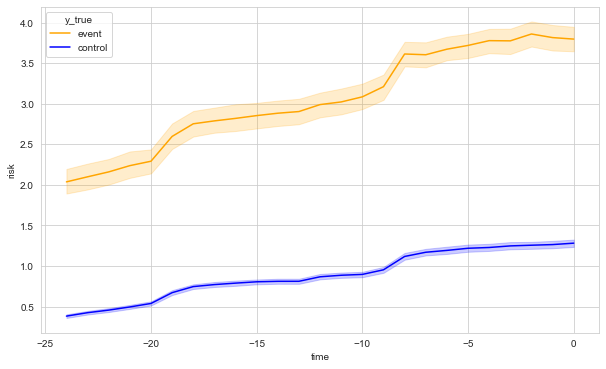

In [79]:
df_pos = pd.DataFrame(data={'y_prob': y_pos.reshape([-1]), 'time': list(range(-24,1))*y_pos.shape[0]})
df_pos['y_true'] = 'event'
print(df_pos.head(5))
print(df_pos.shape)
df_neg = pd.DataFrame(data={'y_prob': y_neg.reshape([-1]), 'time': list(range(-24,1))*y_neg.shape[0]})
df_neg['y_true'] = 'control'
print(df_neg.head(5))
print(df_neg.shape)
df_res = pd.concat([df_pos,df_neg], axis=0)
basemean = np.mean(Y_whole)
print(basemean)
df_res['risk'] = df_res['y_prob']/basemean
plt.figure(figsize=(10,6))
sns.lineplot(data=df_res, x="time", y="risk", hue="y_true", palette=['orange', 'blue']);

In [86]:
# input and output variable name lists
input_vars = ['txp___yes', 'age___vital', 'temp___vital', 'heart_rate___vital', 'resp_rate___vital', 'spo2___vital', 'x_hr_rr___vital', 's_hr___vital', 's_rr___vital', 's_so2___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'sodium___vital', 'wbc___vital', 'phosphorus___vital', 'creatinine___vital', 'platelet_count___vital', 'alt___vital', 'alp___vital', 'ast___vital', 'pco2___vital', 'chloride___vital', 'troponin___vital', 'ptt___vital', 'lactate___vital', 'bun___vital', 'magnesium___vital']
output_var = ['y___pos','y___neg','y___nbc']


# reformat inputs to be 2d image and 1 output per image
X_whole = whole_df[input_vars].values
Y_whole = whole_df[output_var].values
X_whole = np.reshape(X_whole, (-1,25,32) )
Y_whole = np.reshape(Y_whole, (-1,25,3) )[:,0,:]
print(X_whole.shape)
print(Y_whole.shape)


pos_index = np.where(Y_whole[:,0]==1.0)[0]
neg_index = np.where(Y_whole[:,1]==1.0)[0]
nbc_index = np.where(Y_whole[:,2]==1.0)[0]

x = X_whole[pos_index,0,:]
X_new = np.repeat(x[:, np.newaxis, :], 25, axis=1)
y_pos = mdl.predict(X_new)
x = X_whole[neg_index,0,:]
X_new = np.repeat(x[:, np.newaxis, :], 25, axis=1)
y_neg = mdl.predict(X_new)
x = X_whole[nbc_index,0,:]
X_new = np.repeat(x[:, np.newaxis, :], 25, axis=1)
y_nbc = mdl.predict(X_new)

for i in range(1,X_whole.shape[1]):
    print("-------------------")
    # postive
    x = X_whole[pos_index,i,:]
    X_new = np.repeat(x[:, np.newaxis, :], 25, axis=1)
    y = mdl.predict(X_new)
    basemean = np.mean(Y_whole[:,0])
    print("predicted mean {}, basemean {}, relative risk {}".format(np.mean(y), basemean, np.mean(y)/basemean))
    y_pos = np.column_stack((y_pos,y))
    # negative
    x = X_whole[neg_index,i,:]
    X_new = np.repeat(x[:, np.newaxis, :], 25, axis=1)
    y = mdl.predict(X_new)
    basemean = np.mean(Y_whole[:,0])
    print("predicted mean {}, basemean {}, relative risk {}".format(np.mean(1-y), basemean, np.mean(y)/basemean))
    y_neg = np.column_stack((y_neg,y))
    # no blood culture
    x = X_whole[nbc_index,i,:]
    X_new = np.repeat(x[:, np.newaxis, :], 25, axis=1)
    y = mdl.predict(X_new)
    basemean = np.mean(Y_whole[:,0])
    print("predicted mean {}, basemean {}, relative risk {}".format(np.mean(1-y), basemean, np.mean(y)/basemean))
    y_nbc = np.column_stack((y_nbc,y))
    

(6557, 25, 32)
(6557, 3)
-------------------
predicted mean 0.28082892298698425, basemean 0.13375019063596158, relative risk 2.0996525063006337
predicted mean 0.9451011419296265, basemean 0.13375019063596158, relative risk 0.41045780481182315
predicted mean 0.9365996718406677, basemean 0.13375019063596158, relative risk 0.47402130506567425
-------------------
predicted mean 0.2889309227466583, basemean 0.13375019063596158, relative risk 2.160228119099018
predicted mean 0.94100022315979, basemean 0.13375019063596158, relative risk 0.4411190031404302
predicted mean 0.931923508644104, basemean 0.13375019063596158, relative risk 0.5089826103015256
-------------------
predicted mean 0.2992308735847473, basemean 0.13375019063596158, relative risk 2.2372369875657787
predicted mean 0.9348046183586121, basemean 0.13375019063596158, relative risk 0.4874414109721559
predicted mean 0.9298467636108398, basemean 0.13375019063596158, relative risk 0.5245090410826959
-------------------
predicted mean

    y_prob  time    y_true      risk
0  0.03243   -24  positive  0.242463
1  0.03243   -23  positive  0.242463
2  0.03243   -22  positive  0.242463
3  0.03243   -21  positive  0.242463
4  0.03243   -20  positive  0.242463
(21925, 4)
     y_prob  time    y_true      risk
0  0.031721   -24  negative  0.237168
1  0.031721   -23  negative  0.237168
2  0.031721   -22  negative  0.237168
3  0.031721   -21  negative  0.237168
4  0.197114   -20  negative  1.473751
(107975, 4)
     y_prob  time    y_true      risk
0  0.032575   -24  baseline  0.243553
1  0.032575   -23  baseline  0.243553
2  0.032575   -22  baseline  0.243553
3  0.032575   -21  baseline  0.243553
4  0.032575   -20  baseline  0.243553
(34025, 4)


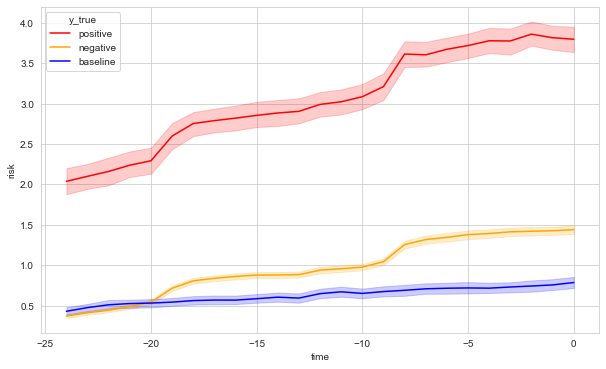

In [87]:
df_pos = pd.DataFrame(data={'y_prob': y_pos.reshape([-1]), 'time': list(range(-24,1))*y_pos.shape[0]})
df_pos['y_true'] = 'positive'
df_pos['risk'] = df_pos['y_prob']/np.mean(Y_whole[:,0])
print(df_pos.head(5))
print(df_pos.shape)
df_neg = pd.DataFrame(data={'y_prob': y_neg.reshape([-1]), 'time': list(range(-24,1))*y_neg.shape[0]})
df_neg['y_true'] = 'negative'
df_neg['risk'] = df_neg['y_prob']/np.mean(Y_whole[:,0])
print(df_neg.head(5))
print(df_neg.shape)
df_nbc = pd.DataFrame(data={'y_prob': y_nbc.reshape([-1]), 'time': list(range(-24,1))*y_nbc.shape[0]})
df_nbc['y_true'] = 'baseline'
df_nbc['risk'] = df_nbc['y_prob']/np.mean(Y_whole[:,0])
print(df_nbc.head(5))
print(df_nbc.shape)
df_res = pd.concat([df_pos,df_neg,df_nbc], axis=0)
plt.figure(figsize=(10,6))
sns.lineplot(data=df_res, x="time", y="risk", hue="y_true", palette=['red','orange', 'blue']);

### Model performance (AUC) over time

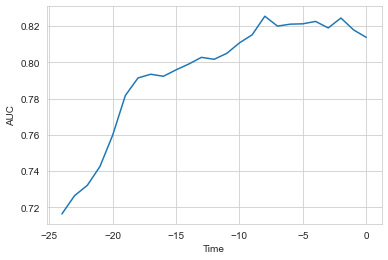

In [84]:
import sklearn

score_list = list()
y_true = Y_whole[:,0]
x = X_whole[:,0,:]
X_new = np.repeat(x[:, np.newaxis, :], 25, axis=1)
y_pred = mdl.predict(X_new)
score = sklearn.metrics.roc_auc_score(y_true, y_pred)
score_list.append(score)

for i in range(1,X_whole.shape[1]):
    x = X_whole[:,i,:]
    X_new = np.repeat(x[:, np.newaxis, :], 25, axis=1)
    y_pred = mdl.predict(X_new)
    score=sklearn.metrics.roc_auc_score(y_true, y_pred)
    score_list.append(score)

df_score = pd.DataFrame({'AUC':score_list,'Time':range(-24,1)})
sns.lineplot(data=df_score, x="Time", y="AUC");

## Feature permutation importance

In [43]:
import random
import sklearn
X_whole_org = np.reshape(whole_df[input_vars].values, (-1,25,32) )
y_prob = mdl.predict(X_whole_org)
y_true = Y_whole
base_score = sklearn.metrics.roc_auc_score(y_true, y_prob)
base_score

0.912137247659274

In [ ]:
# score_arr = np.empty(shape=(X_whole_org.shape[1]-3, X_whole_org.shape[2]))
# # permutation at each time point in each variable
# for i in range(3,X_whole_org.shape[1]): # time 
#     for j in range(X_whole_org.shape[2]): # variable
#         X_whole = X_whole_org.copy()
#         values = X_whole[:,range(i-3,i),j].reshape(-1)
#         np.random.shuffle(values)
#         X_whole[:,range(i-3,i),j] = values.reshape(X_whole[:,range(i-3,i),j].shape)
#         score_arr[i-3,j] = sklearn.metrics.roc_auc_score(y_true, mdl.predict(X_whole))
        
# np.save("./score_permuate_lstm_pctl_ma.npy",score_arr)  

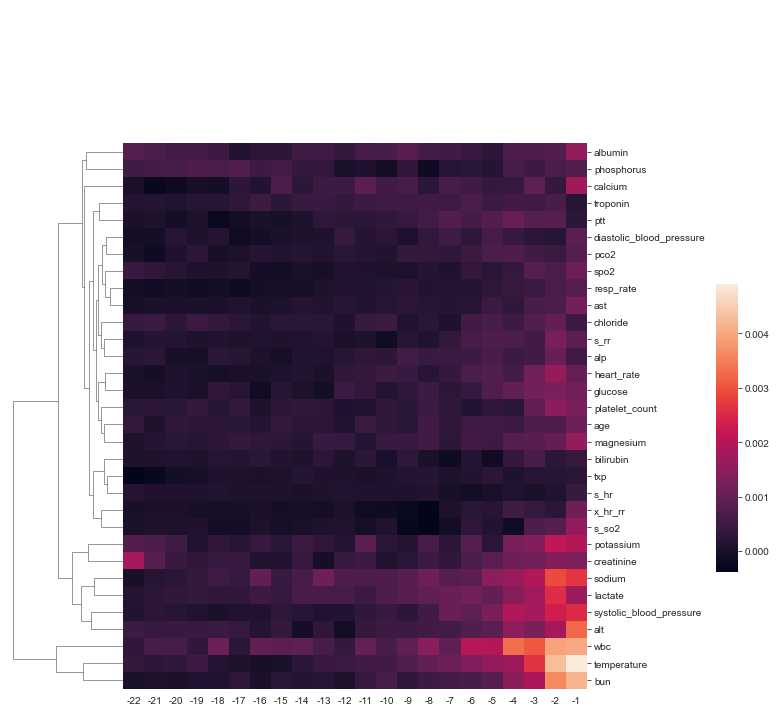

In [85]:
base_score = 0.912137247659274
score_arr = np.load("./score_permuate_lstm_pctl_ma.npy")
score_delta = base_score - score_arr
score_delta_T = score_delta.T

input_vars = ['txp', 'age', 'temperature', 'heart_rate', 'resp_rate', 'spo2', 'x_hr_rr', 's_hr', 's_rr', 
              's_so2', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'glucose', 'bilirubin', 
              'potassium', 'albumin', 'calcium', 'sodium', 'wbc', 'phosphorus', 'creatinine', 'platelet_count',
              'alt', 'alp', 'ast', 'pco2', 'chloride', 'troponin', 'ptt', 'lactate', 'bun', 'magnesium']
output_var = ['y___pos']
score_delta_T_df = pd.DataFrame(score_delta_T, index=input_vars, columns=range(-22,0))
sns.clustermap(score_delta_T_df, row_cluster=1, col_cluster=0, #metric="correlation",
                   cbar_pos=(1, .2, .03, .4))


In [72]:
# base_score = 0.912137247659274
# score_arr = np.load("./score_permuate_lstm_pctl_ma.npy")
# score_delta = np.log(base_score - score_arr+0.001)
# score_delta_df = pd.DataFrame(score_delta.reshape(-1)).rank(pct=True)
# score_delta = np.array(score_delta_df).reshape((score_delta.shape[0],score_delta.shape[1]))
# score_delta_T = score_delta.T

# input_vars = ['txp', 'age', 'temperature', 'heart_rate', 'resp_rate', 'spo2', 'x_hr_rr', 's_hr', 's_rr', 
#               's_so2', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'glucose', 'bilirubin', 
#               'potassium', 'albumin', 'calcium', 'sodium', 'wbc', 'phosphorus', 'creatinine', 'platelet_count',
#               'alt', 'alp', 'ast', 'pco2', 'chloride', 'troponin', 'ptt', 'lactate', 'bun', 'magnesium']
# output_var = ['y___pos']
# score_delta_T_df = pd.DataFrame(score_delta_T, index=input_vars, columns=range(-22,0))
# sns.clustermap(score_delta_T_df, row_cluster=1, col_cluster=0, metric="correlation",
#                    cbar_pos=(1, .2, .03, .4))
